# Prepare Data for EDA and Models

In [2]:
# Imports
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt


#from datetime import datetime, date

In [3]:
def combine_files(path_to_files):
    df = pd.DataFrame()
    file_list = listdir('../data/')
    for file in file_list:
        if ('.csv' in file) & (file != 'all_states.csv'):
            df = pd.concat([df, pd.read_csv(f'../data/{file}')])
    return df

In [4]:
all_states = combine_files('../data/')
all_states.head()

,state,week,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
0,Alaska,2017-12-31,28,46,24,37,0,0,0,0,0,0
1,Alaska,2018-01-07,37,45,25,65,37,0,0,0,0,0
2,Alaska,2018-01-14,10,46,16,53,30,0,0,0,0,0
3,Alaska,2018-01-21,33,41,10,35,14,0,0,0,0,0
4,Alaska,2018-01-28,32,24,0,40,0,0,0,0,0,0


In [5]:
# updating the week column to be datetime type
all_states['week'] = pd.to_datetime(all_states['week'], format = '%Y-%m-%d')
all_states.dtypes

state                          object
week                   datetime64[ns]
depression                      int64
anxiety                         int64
addiction                       int64
counselling                     int64
mental_health                   int64
stay_at_home                    int64
mask_mandate                    int64
gatherings_banned               int64
business_closures               int64
travel_restrictions             int64
dtype: object

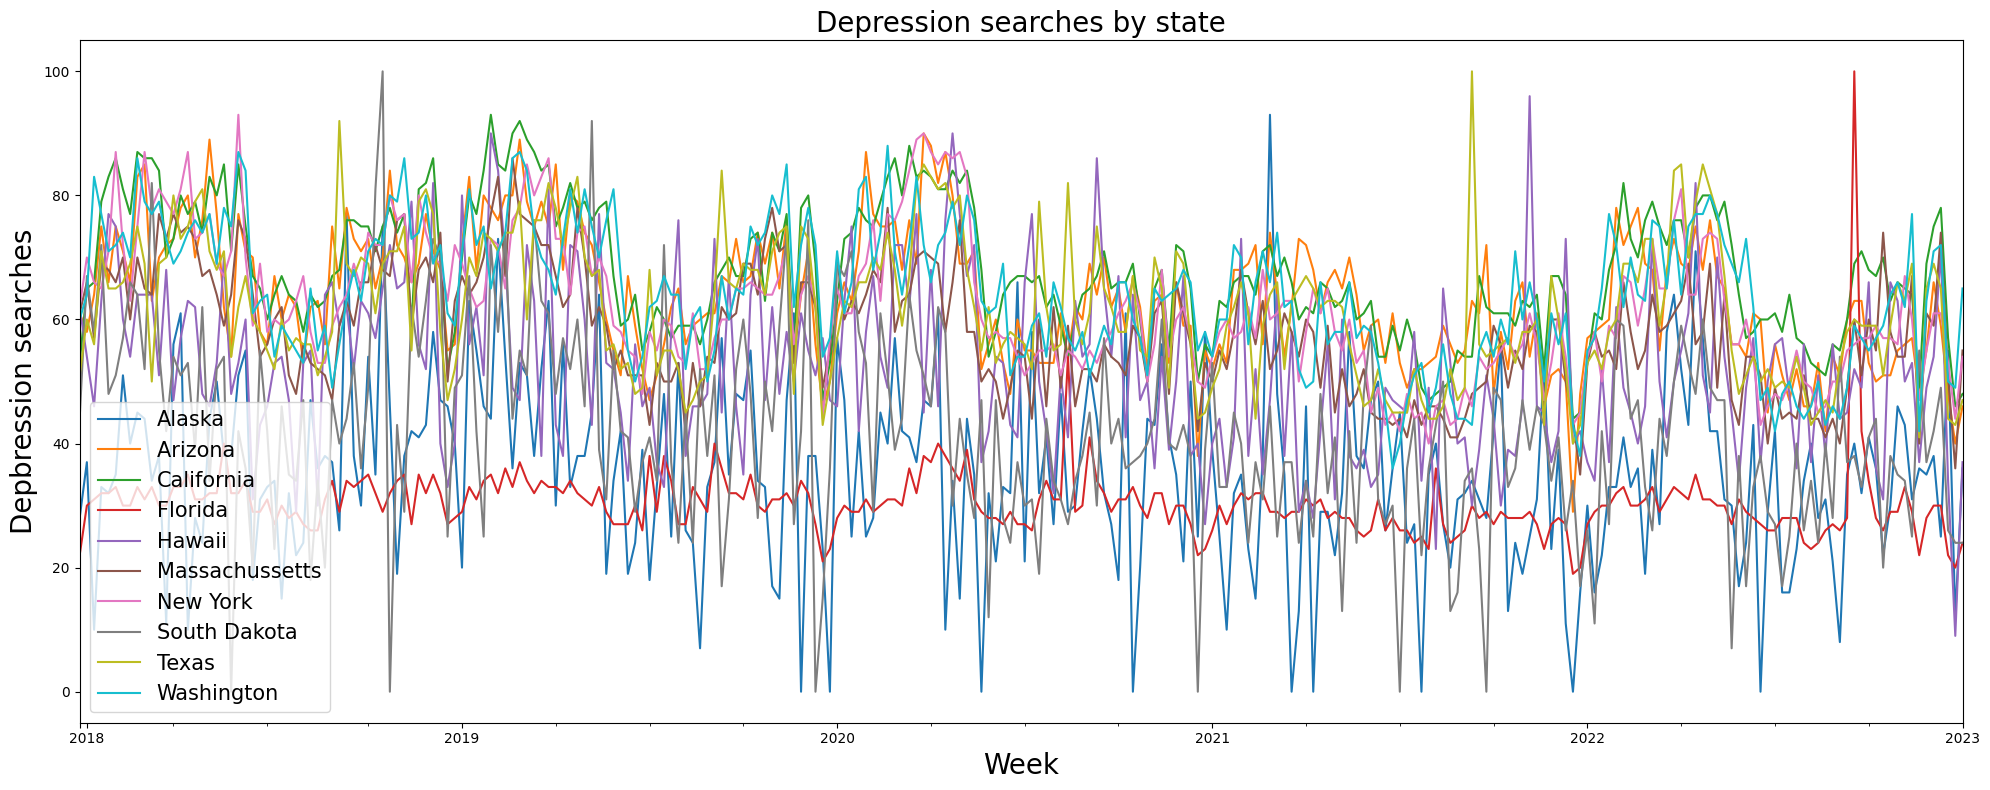

In [7]:
# Group by states and week

all_states.groupby(['week', 'state']).mean().unstack('state')['depression'].plot(figsize = (20, 8))
plt.xlabel('Week', size = 20)
plt.title('Depression searches by state', size = 20)
plt.ylabel('Depbression searches', size = 20)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('../images/Depression by state and week.jpeg');

Two much information for one plot, It is hard to see what is goen on for each state. The states needs to be grouped. We are looking at the COVID19 restrictions and will group states by restrictions levels.

In [14]:
all_states['covid_restrictions'] = all_states['state'].apply(lambda x: 'Most Restrictions' if (x == 'Washington') | (x == 'New York') | (x == 'California') | (x == 'Hawaii') | (x == 'Alaska') else 'Least Restrictions')

In [19]:
all_states[all_states['state']=='Florida'].tail()

,state,week,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions,covid_restrictions
257,Florida,2022-12-04,30,41,11,16,26,0,0,0,0,0,Least Restrictions
258,Florida,2022-12-11,30,36,11,15,25,0,0,0,0,0,Least Restrictions
259,Florida,2022-12-18,22,33,13,14,16,0,0,0,0,0,Least Restrictions
260,Florida,2022-12-25,20,35,10,11,17,0,0,0,0,0,Least Restrictions
261,Florida,2023-01-01,24,39,9,16,21,0,0,0,0,0,Least Restrictions


In [25]:
# Save combined data to csv
all_states.to_csv('../data/all_states.csv', index=False)

In [28]:
def plot_search_by_week_restriction(search):
    '''
    Input: Search term
    Output: Plot for this search term by week and COVID Restrictions severity
    '''
    search_str = search.title()
    if search == 'mental_health':
        search_str = 'Mental Health'
    all_states.groupby(['week', 'covid_restrictions']).mean().unstack('covid_restrictions')[search].plot(figsize = (20, 8))
    plt.xlabel('Week', size = 20)
    plt.title(f'{search_str} searches by COVID Restrictions severity', size = 20)
    plt.ylabel(f'{search_str} searches', size = 20)
    plt.legend(fontsize = 15)
    plt.tight_layout()
    plt.savefig(f'../images/{search_str} by covid_restrictions and week.jpeg');


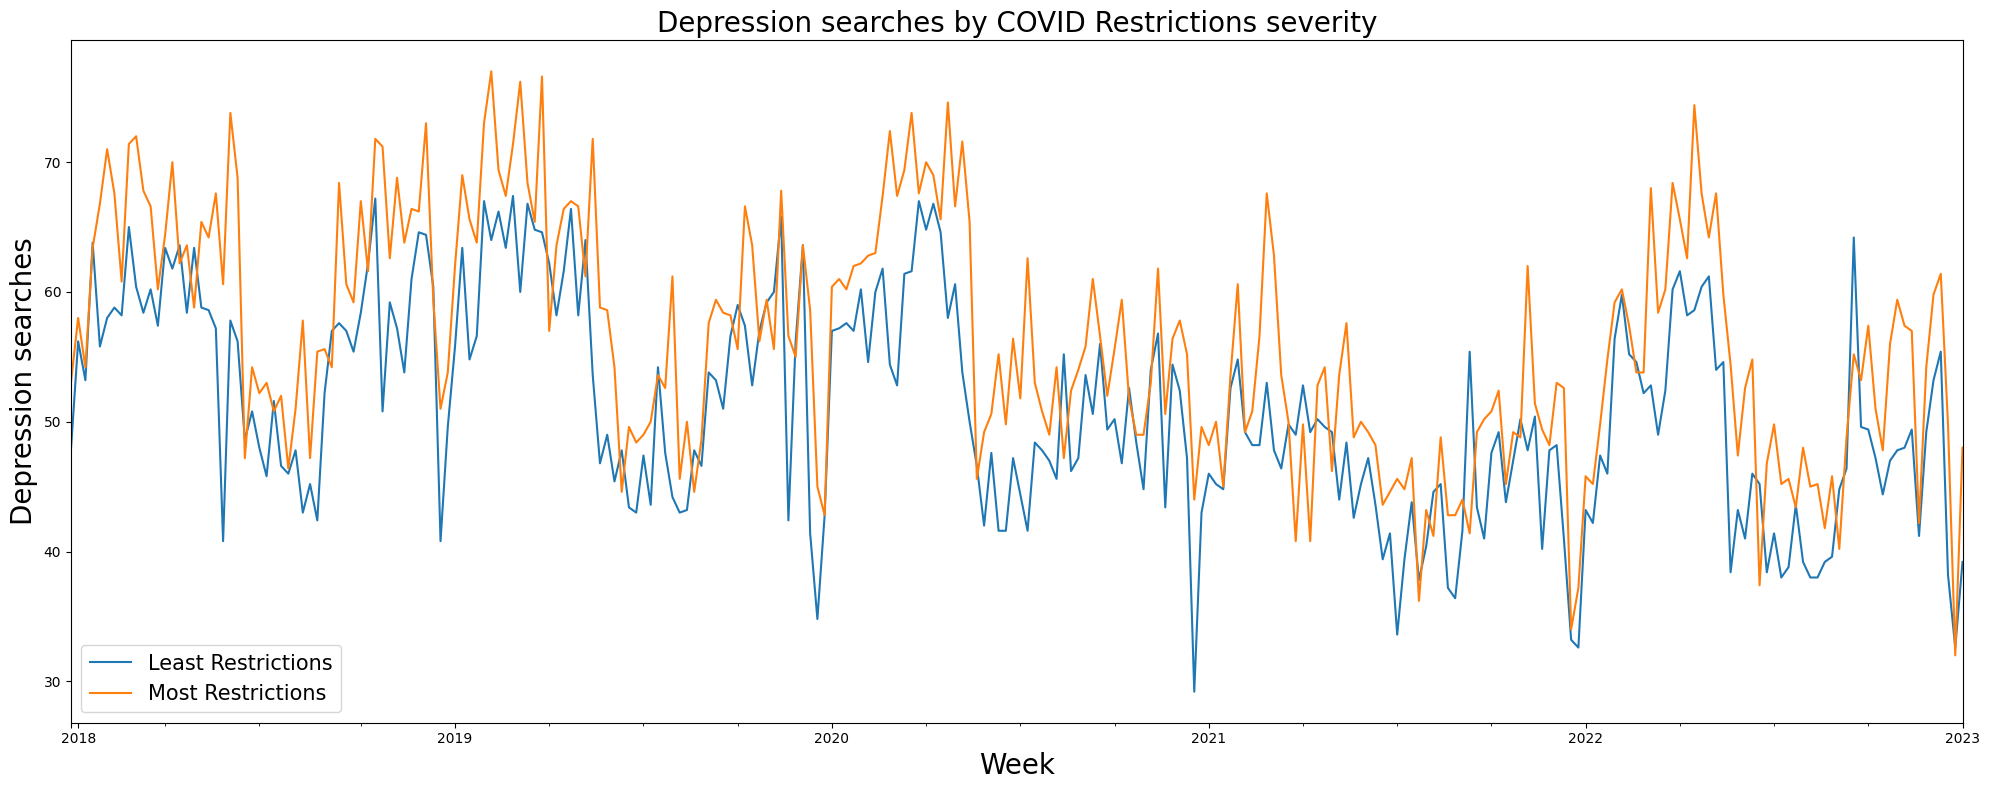

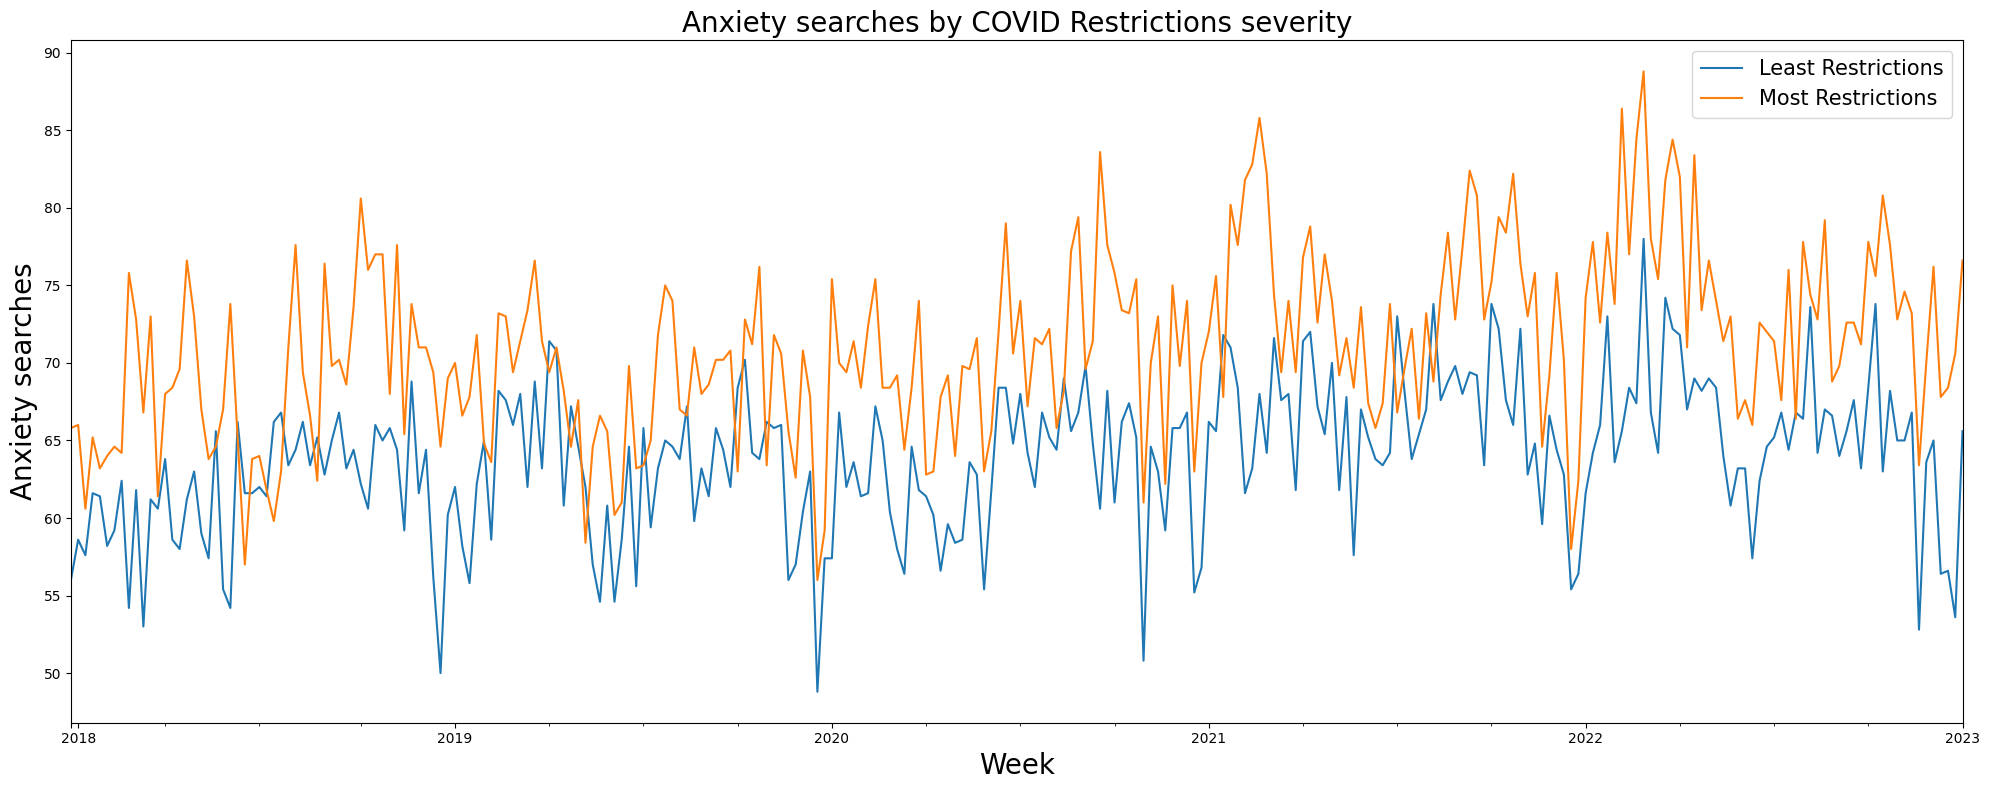

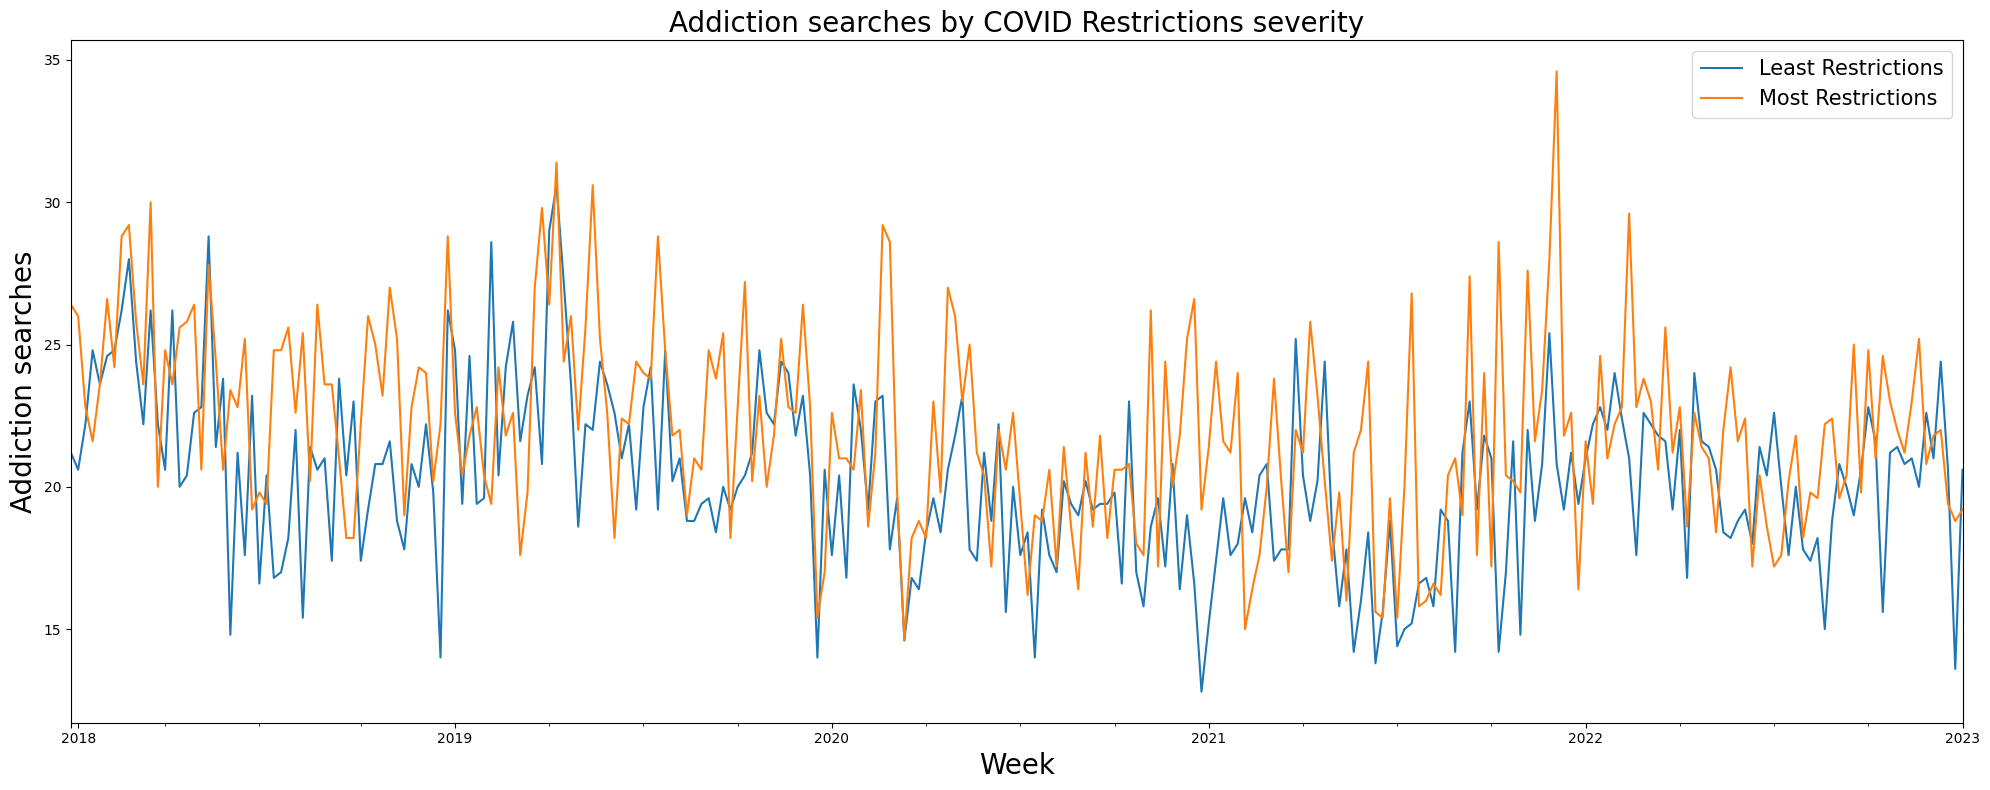

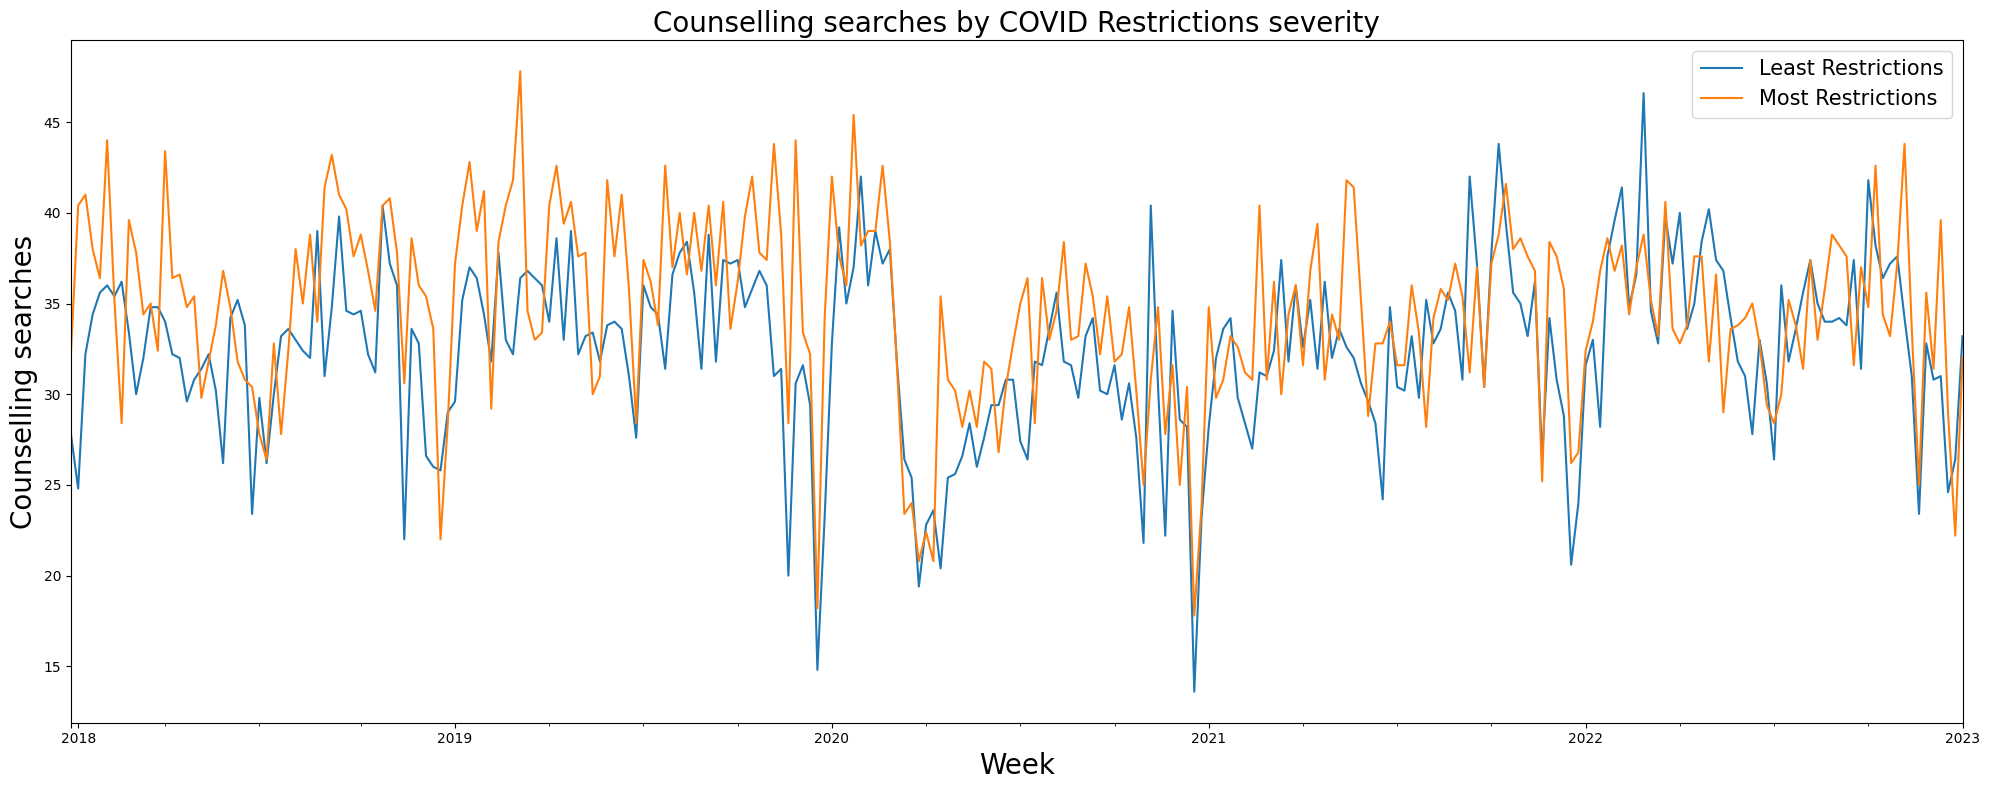

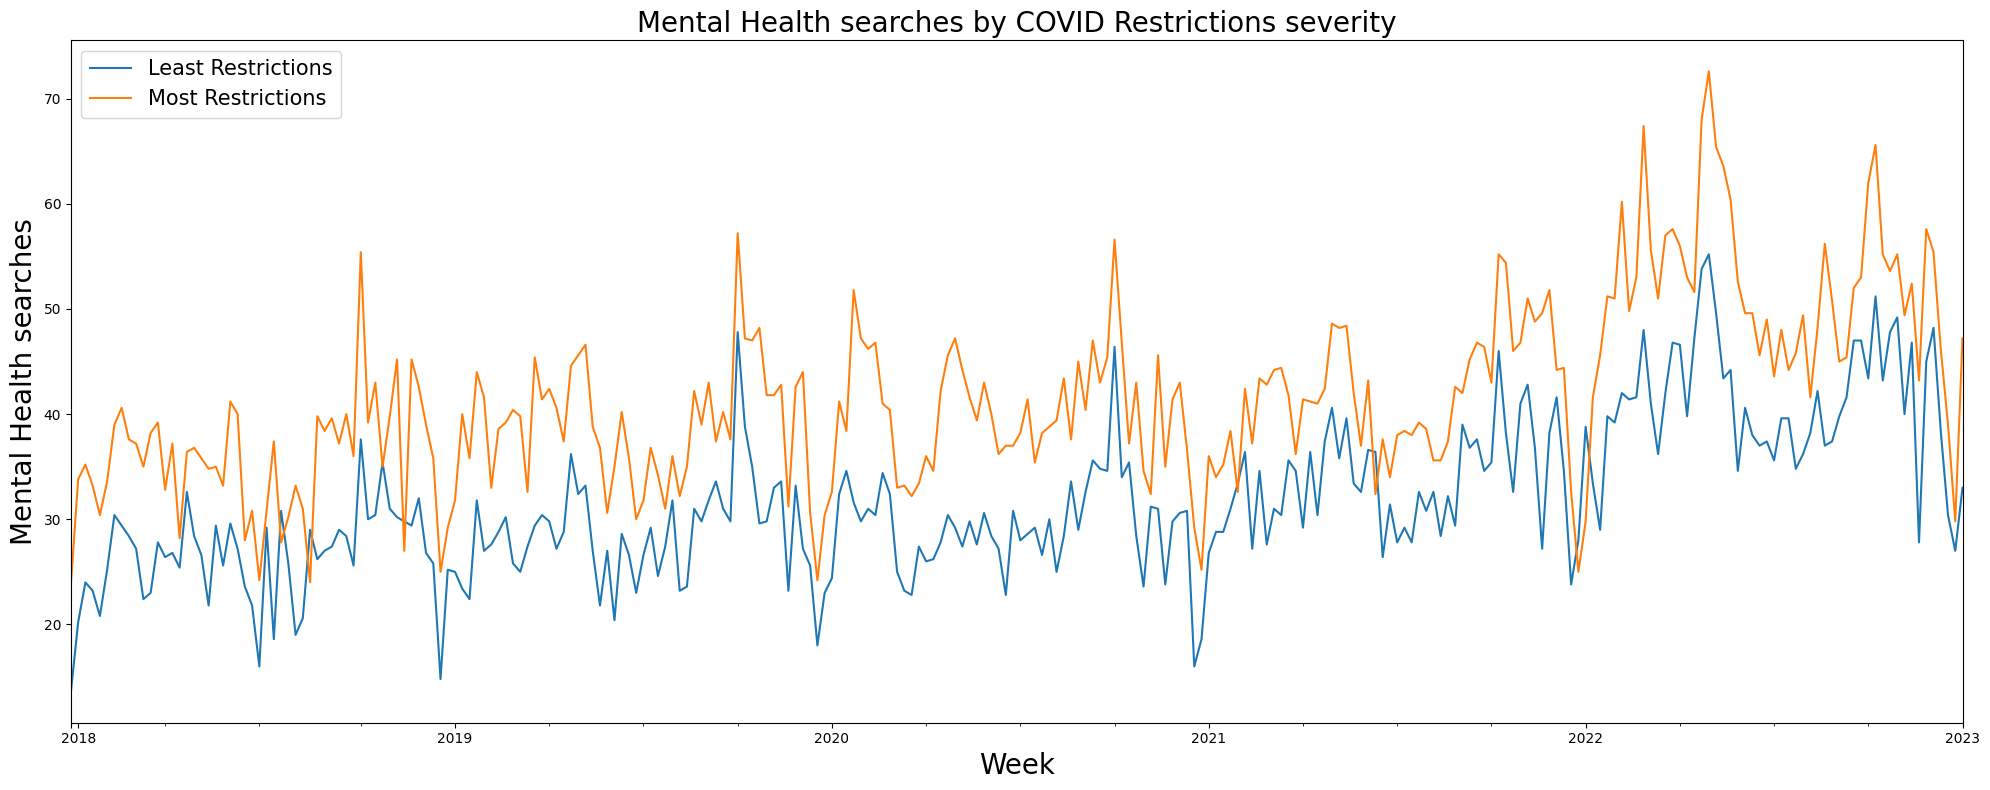

In [29]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']

for search in searches_list:
    plot_search_by_week_restriction(search)